Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe named "data" from the given datafile and print it's head

In [3]:
data=pd.read_csv("datasets_insurance.csv",header=0)
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [4]:
print(data.shape)
print(data.dtypes)
print(data.describe())
print(data.info())

(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3  

Check if there are missing values. If yes, handle them.

In [5]:
data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

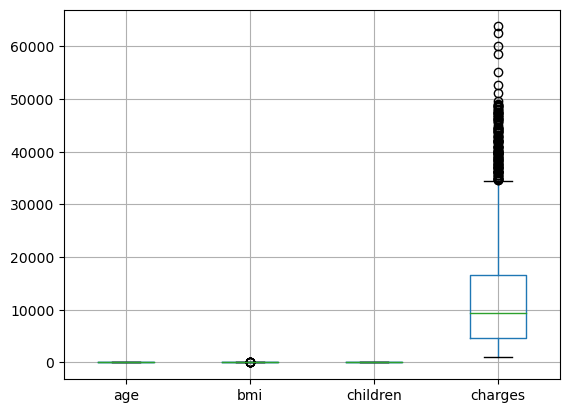

In [7]:
data.boxplot()
plt.show()

In [8]:
data["sex"]=data["sex"].replace({"male":0,"female":1})

In [9]:
data["smoker"]=data["smoker"].replace({"yes":0,"no":1})

In [10]:
data["region"]=data["region"].replace({"northeast":0,"northwest":1,"southeast":2,"southwest":3})

In [11]:
data.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
5,31,1,25.740,0,1,2,3756.62160
6,46,1,33.440,1,1,2,8240.58960


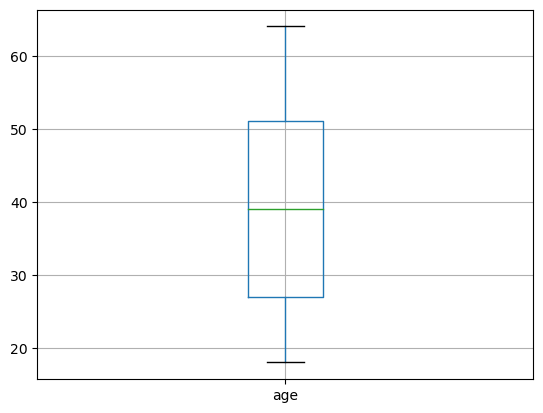

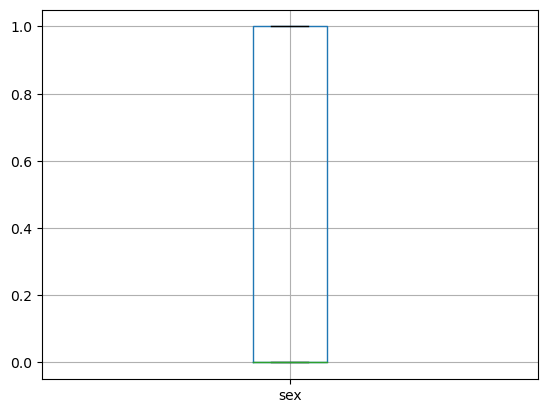

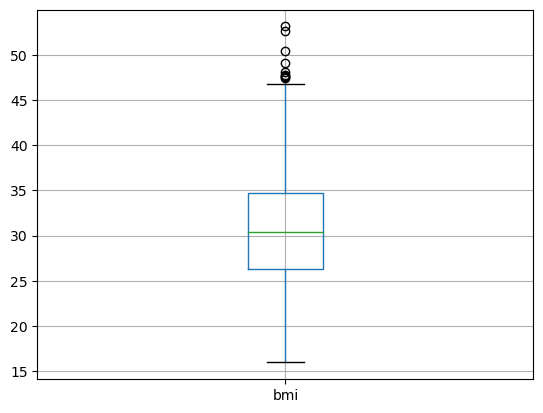

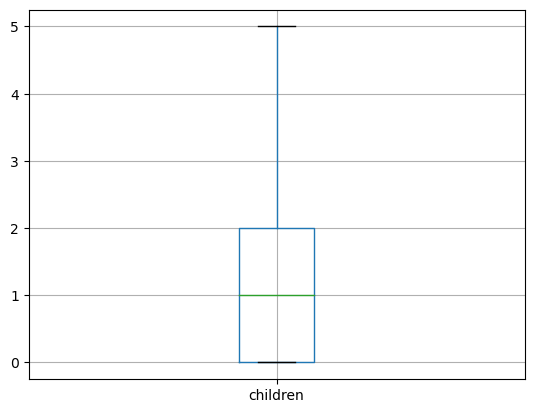

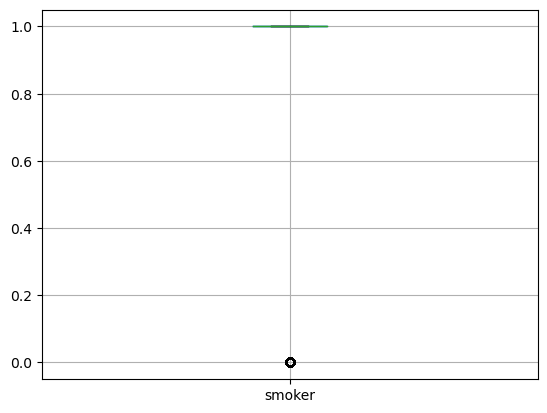

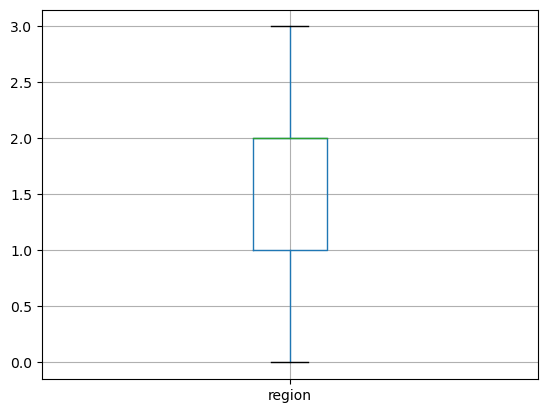

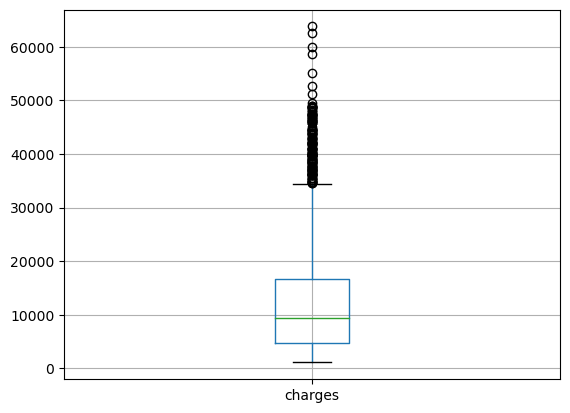

In [12]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

Check for Assumption 2-Assumption of Linearity<br>

Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

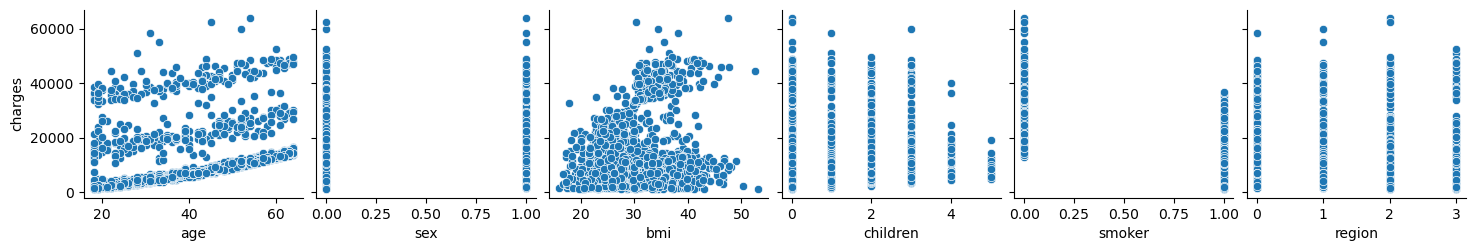

In [13]:
sns.pairplot(data,x_vars=["age","sex","bmi","children","smoker","region"],y_vars=["charges"],kind="scatter")
plt.show()

Create X and Y

In [14]:
x=data[["age","sex","bmi","children","smoker","region"]]
y=data["charges"]

In [15]:
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

In [16]:
import warnings
warnings.filterwarnings("ignore")

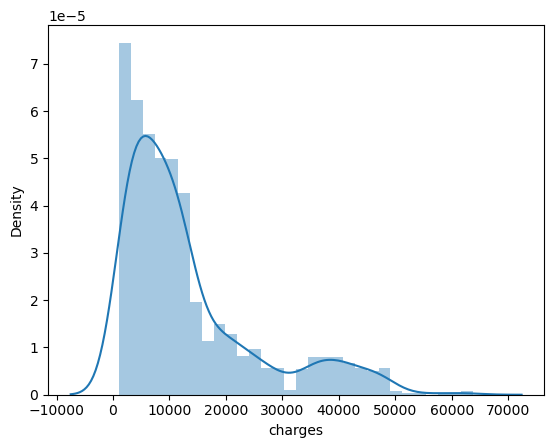

In [17]:
sns.distplot(y)
plt.show()

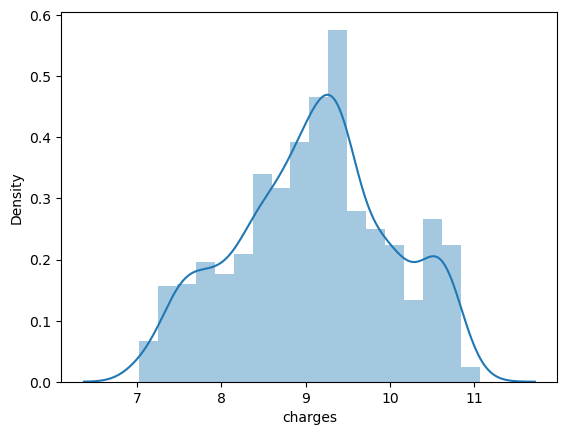

In [18]:
y_log=np.log(y)
sns.distplot(y_log)
plt.show()

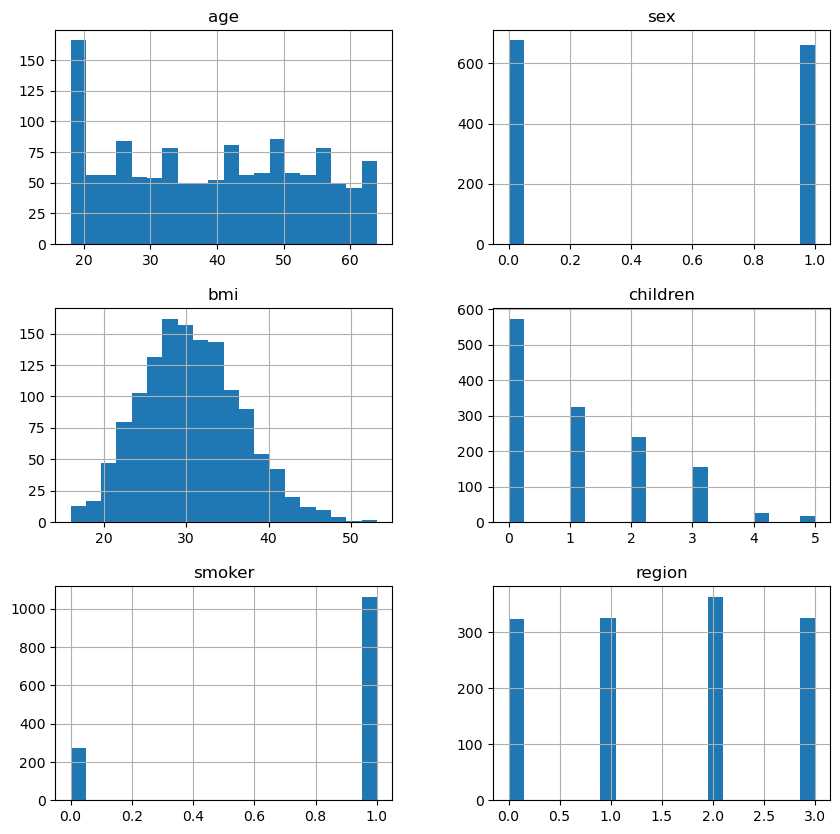

In [19]:
x.hist(bins=20,figsize=(10,10))
plt.show()      

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of replace function. <br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3<br><br>
Hint: df.Sex.replace({"Female":0,"Male":1}, inplace=True)

In [20]:
data["sex"]=data["sex"].replace({"male":0,"female":1})

In [21]:
data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 0})

In [22]:
data['region'] = data['region'].replace({'northeast': 0, 'northwest': 1 , 'southeast': 2 , 'southwest': 3})

Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

In [23]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = x.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index])

age         0.055610
sex         0.020928
bmi         0.283729
children    0.937328
smoker     -1.463124
region     -0.038058
dtype: float64
children    0.937328
smoker     -1.463124
dtype: float64


Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000  0.020856  0.109272  0.048406  0.025019  0.002127
sex       0.020856  1.000000 -0.046371 -0.016296  0.076185 -0.004588
bmi       0.109272 -0.046371  1.000000  0.016178 -0.003750  0.157566
children  0.048406 -0.016296  0.016178  1.000000 -0.013245  0.013722
smoker    0.025019  0.076185 -0.003750 -0.013245  1.000000  0.002181
region    0.002127 -0.004588  0.157566  0.013722  0.002181  1.000000


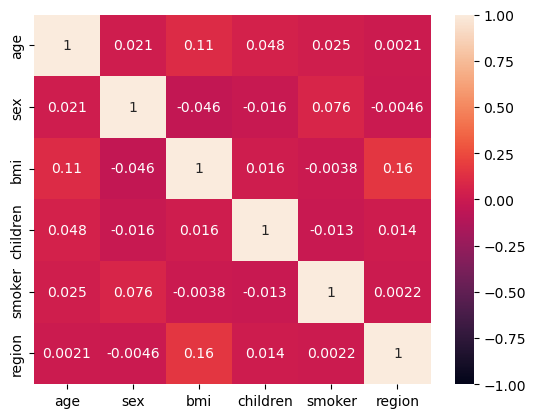

In [24]:
corr_df=x.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df=pd.DataFrame()
vif_df["variables"]=x.columns
vif_df["VIF"]=[vif(x.values,i) for i in range(x.shape[1])]
vif_df.round(2)

,variables,VIF
0,age,7.83
1,sex,1.94
2,bmi,11.55
3,children,2.05
4,smoker,4.46
5,region,2.93


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

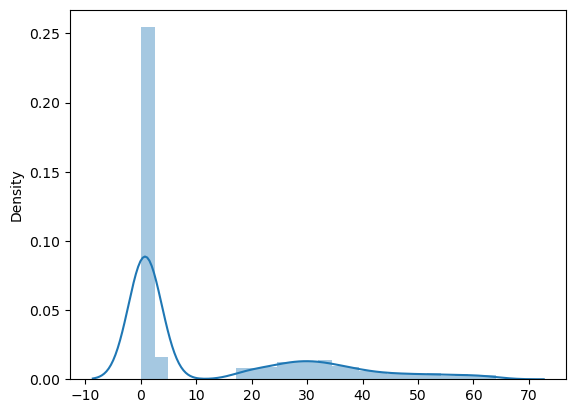

In [26]:
sns.distplot(x)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y_log,test_size=0.3,random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(936, 6)
(936,)
(402, 6)
(402,)


Build a base Linear Regression model using sklearn.

In [28]:
from sklearn.linear_model import LinearRegression

#create a model object
lm=LinearRegression()

#train the model object
lm.fit(x_train,y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

8.522709462515493
[ 0.03514984  0.07018994  0.01124633  0.21627907 -2.25971013 -0.0418371 ]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [29]:
print(list(zip(x.columns,lm.coef_)))

[('age', 0.03514984024528928), ('sex', 0.07018993504473837), ('bmi', 0.011246326045052745), ('children', 0.2162790726201245), ('smoker', -2.2597101345088046), ('region', -0.04183710219867683)]


Predict using the model.

In [30]:
y_pred=lm.predict(x_test)
print(y_pred)

[ 8.89709422  8.55250231  9.47187895  9.3691116   8.29683782  8.97342189
  9.11538462  9.66398662  8.9968002  10.56738198  8.15741439  8.26420903
  8.76058275  9.14042954  9.26754882  9.36404645  8.35383534  9.79275662
  9.1753675  10.25319523 10.57178798  8.04790591  7.95523188  8.81882593
  8.46285596  9.41116348  9.03232496  9.42412704  8.43720343 10.23622618
  7.72141067 10.40264408  8.882177    8.989535    8.47991408  8.89818051
  9.43146545  9.07141831  9.09177918  8.9232356   9.57178053  9.19492257
  8.5407499   8.98344663  7.96809453  8.86354882  8.97417047 10.60984129
  9.30802258  9.2416099  10.03203939  8.29947487  8.94154368  9.6607996
  9.0882374   9.37191032  9.35045453  8.66512971  8.74583732 10.68667516
  7.87542634 10.64505312 11.06892811  7.94787143 10.03152745  8.85507259
  8.50592237  8.93733606  8.90685655  8.97406856  8.82008868  7.99306107
  8.89419076  8.92141744  9.02146752  9.36154545  8.54479781  8.80360543
  7.81211383  9.31803868  9.25938638  9.21980898  9.

Evaluate the model.

In [31]:
new_df=pd.DataFrame()
new_df=x_test.copy()

new_df["Actual charges"]=y_test
new_df["Predicted charges"]=y_pred

In [32]:
new_df

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges
7,37,1,27.740,1.386294,0.693147,1,8.893093,8.897094
999,36,1,26.885,0.000000,0.693147,1,8.569372,8.552502
1209,59,0,37.100,0.693147,0.693147,3,9.421182,9.471879
491,61,1,25.080,0.000000,0.693147,2,10.106963,9.369112
625,29,1,26.030,0.000000,0.693147,1,8.225895,8.296838
...,...,...,...,...,...,...,...,...
854,49,1,23.845,1.386294,0.000000,0,10.090254,10.883237
554,25,1,41.325,0.000000,0.693147,0,9.791377,8.370088
1278,39,0,29.925,0.693147,0.000000,0,10.019582,10.380013
374,20,0,33.330,0.000000,0.693147,2,7.238158,7.950560


In [33]:
new_df=new_df.reset_index().drop("index",axis=1)
new_df

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges
0,37,1,27.740,1.386294,0.693147,1,8.893093,8.897094
1,36,1,26.885,0.000000,0.693147,1,8.569372,8.552502
2,59,0,37.100,0.693147,0.693147,3,9.421182,9.471879
3,61,1,25.080,0.000000,0.693147,2,10.106963,9.369112
4,29,1,26.030,0.000000,0.693147,1,8.225895,8.296838
...,...,...,...,...,...,...,...,...
397,49,1,23.845,1.386294,0.000000,0,10.090254,10.883237
398,25,1,41.325,0.000000,0.693147,0,9.791377,8.370088
399,39,0,29.925,0.693147,0.000000,0,10.019582,10.380013
400,20,0,33.330,0.000000,0.693147,2,7.238158,7.950560


In [34]:
lm.score(x_train,y_train)

0.7783750948376671

In [35]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-Square",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-Square 0.739671631045358
RMSE 0.4516458862389338
Adj R-square: 0.7384980997052168


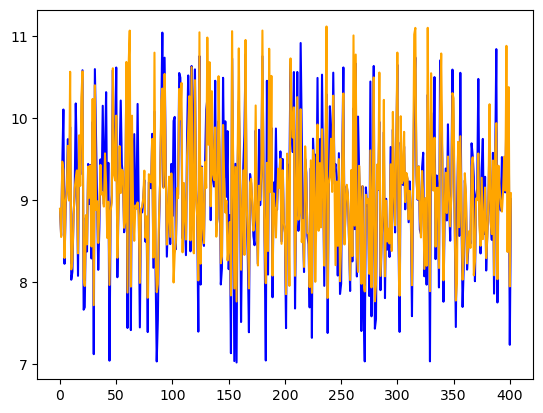

In [36]:
new_df["Actual charges"].plot(color="blue")
new_df["Predicted charges"].plot(color="orange")
plt.show()

In [37]:
lm.score(x_train,y_train)

0.7783750948376671

In [38]:
y_pred=lm.predict(x_test)
y_pred

array([ 8.89709422,  8.55250231,  9.47187895,  9.3691116 ,  8.29683782,
        8.97342189,  9.11538462,  9.66398662,  8.9968002 , 10.56738198,
        8.15741439,  8.26420903,  8.76058275,  9.14042954,  9.26754882,
        9.36404645,  8.35383534,  9.79275662,  9.1753675 , 10.25319523,
       10.57178798,  8.04790591,  7.95523188,  8.81882593,  8.46285596,
        9.41116348,  9.03232496,  9.42412704,  8.43720343, 10.23622618,
        7.72141067, 10.40264408,  8.882177  ,  8.989535  ,  8.47991408,
        8.89818051,  9.43146545,  9.07141831,  9.09177918,  8.9232356 ,
        9.57178053,  9.19492257,  8.5407499 ,  8.98344663,  7.96809453,
        8.86354882,  8.97417047, 10.60984129,  9.30802258,  9.2416099 ,
       10.03203939,  8.29947487,  8.94154368,  9.6607996 ,  9.0882374 ,
        9.37191032,  9.35045453,  8.66512971,  8.74583732, 10.68667516,
        7.87542634, 10.64505312, 11.06892811,  7.94787143, 10.03152745,
        8.85507259,  8.50592237,  8.93733606,  8.90685655,  8.97

In [39]:
new_df["Deviation"]=new_df["Actual charges"]-new_df["Predicted charges"]
new_df.to_excel("Insurance_charges.xlsx",header=True,index=True)
new_df.head()            


,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges,Deviation
0,37,1,27.740,1.386294,0.693147,1,8.893093,8.897094,-0.004001
1,36,1,26.885,0.000000,0.693147,1,8.569372,8.552502,0.016869
2,59,0,37.100,0.693147,0.693147,3,9.421182,9.471879,-0.050697
3,61,1,25.080,0.000000,0.693147,2,10.106963,9.369112,0.737851
4,29,1,26.030,0.000000,0.693147,1,8.225895,8.296838,-0.070943


Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [40]:
from sklearn.linear_model import Ridge

lm=Ridge()
lm.fit(x_train,y_train)

""""
previous value

8.522709462515493
[ 0.03514984  0.07018994  0.01124633  0.21627907 -2.25971013 -0.0418371 ]

"""
print(lm.intercept_)
print(lm.coef_)




8.507423359345
[ 0.03514537  0.06853678  0.01125423  0.21524995 -2.22913665 -0.0419672 ]


In [41]:
y_pred=lm.predict(x_test)
y_pred

array([ 8.89984391,  8.55667639,  9.4767105 ,  9.37302943,  8.30103646,
        8.97702793,  9.11917717,  9.64619657,  8.99965479, 10.54927821,
        8.16215334,  8.26857299,  8.766502  ,  9.14333426,  9.27115734,
        9.36809059,  8.35727139,  9.79687829,  9.17919437, 10.23725632,
       10.55583957,  8.05222143,  7.95961211,  8.82241083,  8.46580216,
        9.41526995,  9.03680636,  9.42675107,  8.44008929, 10.21988571,
        7.72699774, 10.3859417 ,  8.88621949,  8.99428836,  8.48502454,
        8.90122848,  9.43720114,  9.07699136,  9.09602447,  8.92764029,
        9.57578249,  9.19954453,  8.54491572,  8.9877909 ,  7.97398494,
        8.86684704,  8.9793044 , 10.59318845,  9.31385972,  9.24568472,
       10.01462195,  8.30360387,  8.94641099,  9.66391379,  9.09389377,
        9.37753263,  9.35400458,  8.670007  ,  8.75068378, 10.66811409,
        7.88145296, 10.62822928, 11.05179019,  7.95363085, 10.01502819,
        8.85899533,  8.51067286,  8.94203961,  8.91002615,  8.97

In [42]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-Squared:",r2)

rmse=mean_squared_error(y_test,y_pred)
print("RMSE:",rmse)

adjusted_r2=1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adjusted_r2:",adjusted_r2)

R-Squared: 0.7400767456742867
RMSE: 0.20366657321090703
Adjusted_r2: 0.7389050405458463


In [43]:
from sklearn.linear_model import Lasso
lm=Lasso()
lm.fit(x_train,y_train)

""""
previous value

8.522709462515493
[ 0.03514984  0.07018994  0.01124633  0.21627907 -2.25971013 -0.0418371 ]

"""

print(lm.intercept_)
print(lm.coef_)

7.8888757936390075
[ 0.03086241 -0.          0.          0.         -0.         -0.        ]


In [44]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(y_test,y_pred)
print("R2:",r2)

rmse=mean_squared_error(y_test,y_pred)
print("RMSE:",rmse)

adjusted_r2= 1 - (1-r2)*(len(y))/(len(y)-x.shape[1]-1)
print("adjusted_r2:",adjusted_r2)

R2: 0.7400767456742867
RMSE: 0.20366657321090703
adjusted_r2: 0.7387097563577728


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [45]:
new_df=pd.DataFrame()
new_df=x_train.copy()
new_df

,age,sex,bmi,children,smoker,region
428,21,1,16.815,0.693147,0.693147,0
226,28,0,38.060,0.000000,0.693147,2
867,57,0,43.700,0.693147,0.693147,3
397,21,0,31.020,0.000000,0.693147,2
300,36,0,27.550,1.386294,0.693147,0
...,...,...,...,...,...,...
1180,42,1,41.325,0.693147,0.693147,0
1147,20,1,31.920,0.000000,0.693147,1
527,51,1,25.800,0.693147,0.693147,3
1149,42,0,34.100,0.000000,0.693147,3
